In [ ]:
!pip --q install pandas numpy scikit-learn pyswarm

  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from pyswarm import pso

In [ ]:
data_path = '/content/allData800 final (1).csv'
df = pd.read_csv(data_path)

In [ ]:
X = df.drop(['classification'], axis=1)
y = df['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train, X_train_scaled

(     age  gender   vol     sg  freq  sod  pot  chlo  phos  prot  ...  glob  \
 404   34       0   2.0  1.012     0  145  4.9    98   4.2   4.0  ...   0.3   
 522   42       0  10.0  1.030     2  140  3.7   105   6.0   7.0  ...   3.1   
 749   43       0   0.0  1.030     3  138  3.1   102   3.6   6.8  ...   3.0   
 426   59       1   0.0  1.012     3  134  5.3   101   5.2   7.7  ...   3.9   
 41    40       1   1.8  1.015     0  143  4.8   100   4.1   7.0  ...   3.2   
 ..   ...     ...   ...    ...   ...  ...  ...   ...   ...   ...  ...   ...   
 71    31       0   1.8  1.010     0  140  3.6    98   4.5   6.8  ...   3.3   
 106   43       0   0.0  1.030     3  138  3.1   102   3.6   6.8  ...   3.0   
 270   59       0   2.0  1.016     0  144  4.2   101   4.2   7.3  ...   3.1   
 435   65       0  15.0  1.025     2  142  3.8   107   5.0   6.2  ...   3.2   
 102   20       1   0.0  1.030     3  138  3.1   101   3.8   6.3  ...   2.7   
 
      urea  creatinine   bun  uricacid   rbc   wbc

In [ ]:
def objective_function(features, X_train, X_test, y_train, y_test):
    features = np.array(features).astype(int)
    features_idx = np.where(features)[0]

    # atleast 4 max features would be selected
    if len(features_idx) < 4:
        return 1.0

    # base mlp classifier for pso
    clf = MLPClassifier(hidden_layer_sizes=10,
        max_iter=1000,
        alpha=0.0001,
        solver='adam',
        activation='relu',
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        learning_rate_init=0.01)

    clf.fit(X_train[:, features_idx], y_train)

    y_pred = clf.predict(X_test[:, features_idx])

    accuracy = accuracy_score(y_test, y_pred)

    # maximize positive accuracy ----    minimize -ve accuracy
    return -accuracy

In [ ]:
# PSO optimization
lb = [0] * X_train_scaled.shape[1]  # Lower bounds for features (0 for not selected, 1 for selected)
ub = [1] * X_train_scaled.shape[1]  # upper bounds for features
options = {'swarmsize': 50, 'maxiter': 5, 'debug': True}

In [ ]:
from collections import Counter

In [ ]:
np.random.seed(42) # seed for convergence

In [ ]:
# Perform PSO optimization n times
num_iterations = 100
results = []

for i in range(num_iterations):
    # Run PSO to find the best features
    best_features, _ = pso(objective_function, lb, ub, args=(X_train_scaled, X_test_scaled, y_train, y_test), **options)

    # Extract selected features
    best_features = np.array(best_features).astype(int)
    selected_features_idx = np.where(best_features)[0]
    selected_features = X.columns[selected_features_idx]

    print("\n\n\nThe best selected features for the iteration", i , "are: ", selected_features)
    print('\n')

    results.append(tuple(selected_features))

No constraints given.
New best for swarm at iteration 1: [0.05612832 0.         0.18779976 0.         1.         0.84859916
 0.65151736 0.31056214 0.14779654 0.30923591 0.50835804 0.17486176
 0.         1.         0.         0.26774434 0.3876155  1.
 1.         0.57410671 0.73278315] -0.7416666666666667
New best for swarm at iteration 1: [1.         0.5538531  0.42249211 0.78690902 0.26693315 0.
 0.32065712 0.50644301 1.         1.         1.         0.87907716
 0.5367421  0.28265123 0.76882173 0.7970723  0.44640542 0.
 0.39934637 0.74692835 1.        ] -0.9958333333333333
Best after iteration 1: [1.         0.5538531  0.42249211 0.78690902 0.26693315 0.
 0.32065712 0.50644301 1.         1.         1.         0.87907716
 0.5367421  0.28265123 0.76882173 0.7970723  0.44640542 0.
 0.39934637 0.74692835 1.        ] -0.9958333333333333
New best for swarm at iteration 2: [0.61296186 1.         0.73270751 0.65150097 0.51274815 0.
 1.         0.27364078 0.7405828  1.         0.3925323  0.8433

In [ ]:
results

[('gender', 'pot', 'prot', 'ane'),
 ('freq', 'phos', 'pe', 'ane'),
 ('sg', 'sod', 'prot', 'ane'),
 ('vol', 'phos', 'uricacid', 'ane'),
 ('freq', 'urea', 'rbc', 'pcv'),
 ('age', 'sod', 'rbc', 'ane'),
 ('gender', 'freq', 'sod', 'creatinine'),
 ('vol', 'sg', 'phos', 'ane'),
 ('pot', 'prot', 'uricacid', 'ane'),
 ('sg', 'sod', 'uricacid', 'ane'),
 ('age', 'sg', 'freq', 'phos', 'ane'),
 ('age', 'phos', 'rbc', 'ane'),
 ('creatinine', 'bun', 'pe', 'ane'),
 ('vol', 'chlo', 'alb', 'ane'),
 ('gender', 'sod', 'uricacid', 'ane'),
 ('freq', 'urea', 'creatinine', 'ane'),
 ('age', 'freq', 'uricacid', 'ane'),
 ('phos', 'alb', 'rbc', 'ane'),
 ('sg', 'chlo', 'phos', 'bun'),
 ('age', 'sod', 'pot', 'chlo', 'alb', 'uricacid', 'ane'),
 ('sod', 'prot', 'glob', 'ane'),
 ('gender', 'sg', 'freq', 'phos', 'glob', 'urea', 'ane'),
 ('phos', 'glob', 'uricacid', 'ane'),
 ('vol', 'phos', 'rbc', 'ane'),
 ('chlo', 'prot', 'bun', 'uricacid'),
 ('freq', 'pot', 'creatinine', 'bun', 'rbc', 'ane'),
 ('vol', 'phos', 'rbc', 'a

In [ ]:
from itertools import chain
from collections import Counter

all_features = list(chain.from_iterable(features_tuple for features_tuple in results))
feature_counts = Counter(all_features)

print(feature_counts)

Counter({'ane': 84, 'freq': 32, 'phos': 29, 'sg': 25, 'sod': 22, 'chlo': 22, 'glob': 22, 'prot': 21, 'bun': 21, 'uricacid': 20, 'vol': 18, 'age': 18, 'alb': 18, 'pot': 14, 'rbc': 14, 'pe': 11, 'gender': 10, 'creatinine': 10, 'wbc': 10, 'urea': 9, 'pcv': 8})


In [ ]:
best_selected_features = [feature for feature, count in feature_counts.items() if count >= 20]

feature_indices = [index for index, feature in enumerate(X.columns) if feature in best_selected_features]

print("Best Selected Features:", best_selected_features)
print("Indices of Best Selected Features:", feature_indices)

Best Selected Features: ['prot', 'ane', 'freq', 'phos', 'sg', 'sod', 'uricacid', 'bun', 'chlo', 'glob']
Indices of Best Selected Features: [3, 4, 5, 7, 8, 9, 11, 14, 15, 20]


In [ ]:
X_new_train = X_train_scaled[:, feature_indices]
X_new_test = X_test_scaled[:, feature_indices]
y_train = y_train
y_test = y_test

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(
    hidden_layer_sizes=10,
    max_iter=1000,
    alpha=0.0001,   # regularization
    solver='adam',
    activation='relu',
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    learning_rate_init=0.01
)

# clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=1000, random_state=42)

history = clf.fit(X_new_train, y_train)
print(history)

MLPClassifier(early_stopping=True, hidden_layer_sizes=10,
              learning_rate_init=0.01, max_iter=1000, random_state=42)


In [ ]:
y_pred = clf.predict(X_new_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9958333333333333

Classification Report:
               precision    recall  f1-score   support

         ckd       0.99      1.00      0.99        93
      notckd       1.00      0.99      1.00       147

    accuracy                           1.00       240
   macro avg       0.99      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Make predictions on training and testing data
y_train_pred = clf.predict(X_train_scaled[:, feature_indices])
y_test_pred = clf.predict(X_test_scaled[:, feature_indices])

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Confusion Matrix and Classification Report for testing data
conf_matrix = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Training Accuracy: 0.9982142857142857
Testing Accuracy: 0.9958333333333333

Confusion Matrix:
 [[ 93   0]
 [  1 146]]

Classification Report:
               precision    recall  f1-score   support

         ckd       0.99      1.00      0.99        93
      notckd       1.00      0.99      1.00       147

    accuracy                           1.00       240
   macro avg       0.99      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [ ]:
val_loss = clf.validation_scores_
val_loss

validation_accuracy_scores = val_loss

In [ ]:
validation_accuracy_scores

[0.6964285714285714,
 0.8214285714285714,
 0.8035714285714286,
 0.8035714285714286,
 0.8214285714285714,
 0.8571428571428571,
 0.875,
 0.875,
 0.9285714285714286,
 0.9464285714285714,
 0.9464285714285714,
 0.9464285714285714,
 0.9464285714285714,
 0.9464285714285714,
 0.9642857142857143,
 0.9642857142857143,
 0.9642857142857143,
 0.9821428571428571,
 0.9821428571428571,
 0.9821428571428571,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
# finding out loss at each test iteration
val_loss = []

for i in validation_accuracy_scores:
  result = 1 - i
  val_loss.append(result)

val_loss

[0.3035714285714286,
 0.1785714285714286,
 0.1964285714285714,
 0.1964285714285714,
 0.1785714285714286,
 0.1428571428571429,
 0.125,
 0.125,
 0.0714285714285714,
 0.0535714285714286,
 0.0535714285714286,
 0.0535714285714286,
 0.0535714285714286,
 0.0535714285714286,
 0.0357142857142857,
 0.0357142857142857,
 0.0357142857142857,
 0.017857142857142905,
 0.017857142857142905,
 0.017857142857142905,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
import matplotlib.pyplot as plt

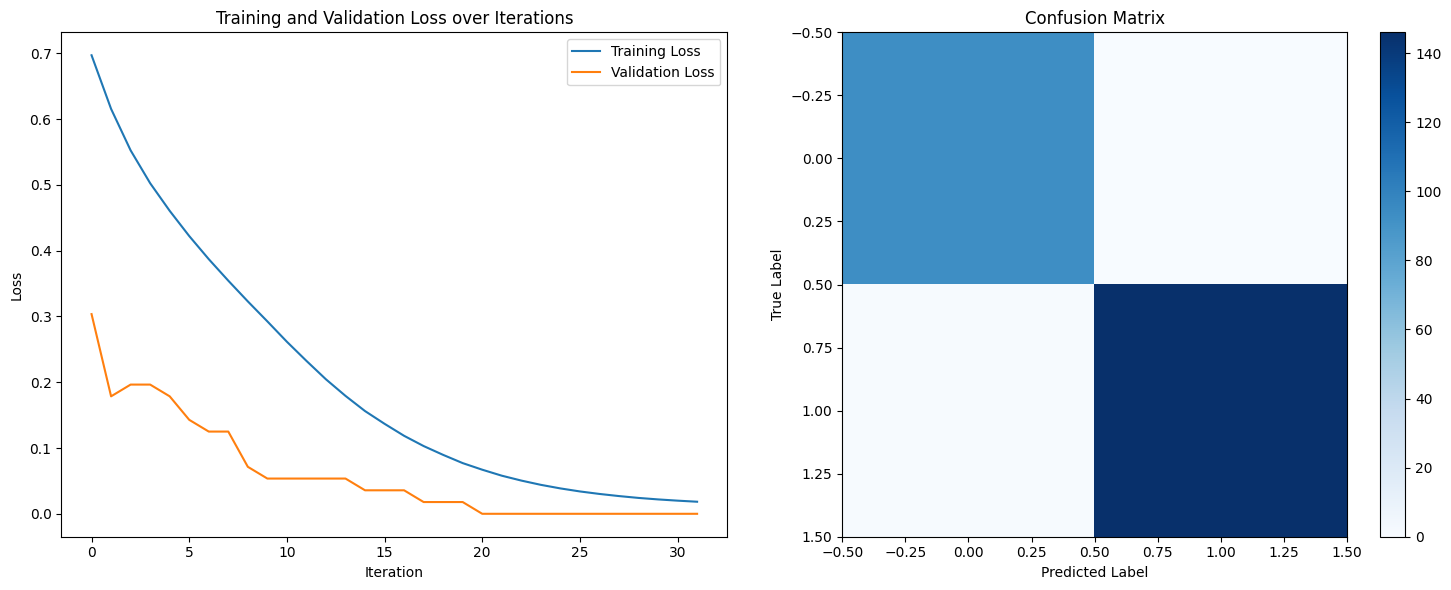

In [ ]:
# Plot learning curves
plt.figure(figsize=(15, 6))

train_loss = clf.loss_curve_

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Plot Confusion Matrix
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(clf, X_new_train, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)

print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.98214286 1.         1.         0.94642857 1.         0.98214286
 0.98214286 0.94642857 0.96428571 1.        ]
Mean Accuracy: 0.9804
Standard Deviation: 0.0203
